In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy.stats import wasserstein_distance

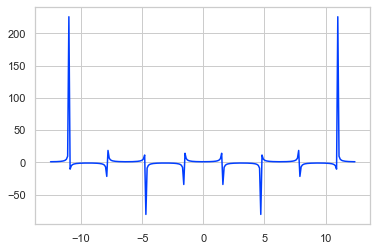

In [2]:
from scipy import signal
import math
x = np.arange(-12.5, 12.5, 0.1)
y = np.zeros(250)
y = 1/np.cos(x)
plt.plot(x, y)
plt.show()

In [3]:
#x = np.arange(1, 31, 1)
signal_3 = pd.DataFrame(zip(x,y),columns=['Time','Value'])

# GMM on actual time series

In [4]:
dfx = signal_3
lowest_bic = np.infty
bic = []
n_components_range = range(1, 50)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [5]:
print(best_gmm, '\n')
print('WEIGHTS -', best_gmm.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', best_gmm.means_, '\n')

GaussianMixture(covariance_type='diag', n_components=3) 

WEIGHTS - [0.50879834 0.46717074 0.02403092] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[6.49640768e+01 2.36828145e-06]
 [1.87900419e+02 3.08463359e-05]
 [1.52503839e+02 2.62673736e-01]] 



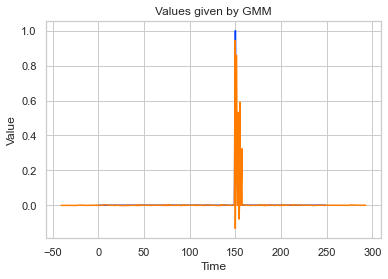

In [6]:
z,_ = best_gmm.sample(250)
plt.title('Actual data')
sns.lineplot(signal_3['Time'], signal_3['Value'])
#plt.show()
plt.title('Values given by GMM')
sns.lineplot(z[:,0],z[:,1])
plt.show()

In [8]:
from scipy.stats import wasserstein_distance
wasserstein_distance(signal_3['Value'], z[:, 1])

0.011245461210998996

# GMM on abs FFT

In [4]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(np.abs(f[:N//2+1]),np.abs(yf[:N//2+1])),columns=['Freq','Ampli'])
    return fft_data

In [5]:
freq_ampli = freq(signal_3)

<AxesSubplot:xlabel='Freq', ylabel='Ampli'>

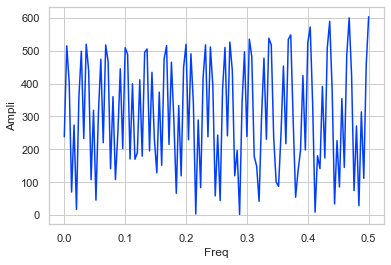

In [6]:
#plt.figure(figsize=(10,6))
sns.lineplot(freq_ampli['Freq'], freq_ampli['Ampli'])
#plt.xlim(-0.1, 0.1)

In [99]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 50)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm
best_gmm1 = GMM_fit(freq_ampli)

In [100]:
print(best_gmm1, '\n')
print('WEIGHTS -', best_gmm1.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', best_gmm1.means_, '\n')

GaussianMixture(n_components=9) 

WEIGHTS - [0.12549097 0.19805589 0.10936201 0.13024628 0.09587314 0.05376256
 0.10091326 0.11830427 0.06799164] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[0.40472742 0.75852729]
 [0.10943921 1.32808052]
 [0.28590645 0.87842731]
 [0.46909012 0.73482419]
 [0.18310775 1.0957307 ]
 [0.0116059  1.57640591]
 [0.2328969  0.97435878]
 [0.34328703 0.8064426 ]
 [0.04231339 1.53106403]] 



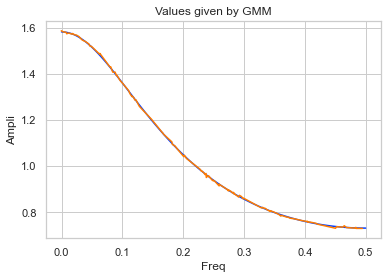

In [101]:
z2,_ = best_gmm1.sample(126)
plt.title('Actual data')
sns.lineplot(freq_ampli['Freq'], freq_ampli['Ampli'])
#plt.show()
plt.title('Values given by GMM')
sns.lineplot(z2[:,0],z2[:,1])
plt.show()

In [102]:
wasserstein_distance(freq_ampli['Ampli'], z2[:, 1])

0.01881887088893923

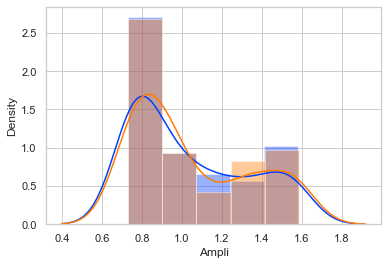

In [103]:
sns.distplot(freq_ampli['Ampli'], kde = True)
sns.distplot(z2[:, 1], kde = True)
plt.show()

# GMM on FFT of actual time series

In [104]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    freq_ampli_real = pd.DataFrame(zip(f[:N//2+1],yf[:N//2+1].real),columns=['Freq','Ampli'])
    freq_ampli_img = pd.DataFrame(zip(f[:N//2+1],yf[:N//2+1].imag),columns=['Freq','Ampli'])
    return freq_ampli_real,freq_ampli_img
freq_ampli3,freq_ampli3i = freq(signal_3)

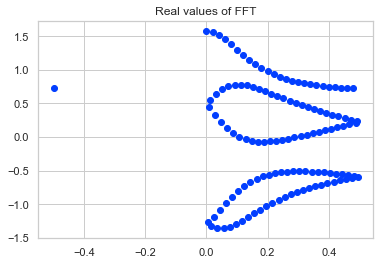

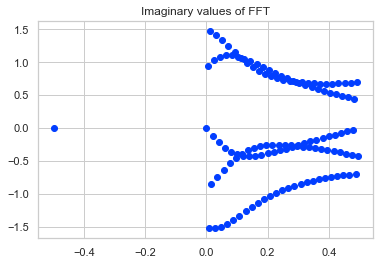

In [105]:
plt.scatter(freq_ampli3['Freq'], freq_ampli3['Ampli'])
plt.title('Real values of FFT')
plt.show()
plt.scatter(freq_ampli3i['Freq'], freq_ampli3i['Ampli'])
plt.title('Imaginary values of FFT')
plt.show()

In [106]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 50)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm

In [107]:
best_gmm0 = GMM_fit(freq_ampli3)                        # GMM on real part of FFT data
best_gmm0i = GMM_fit(freq_ampli3i)                      # GMM on imaginary part of FFT data

In [108]:
print(best_gmm0, '\n')
print('WEIGHTS -', best_gmm0.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',best_gmm0.means_, '\n')

GaussianMixture(n_components=20) 

WEIGHTS - [0.07920064 0.03968615 0.06367533 0.03174188 0.03998895 0.01563562
 0.0555758  0.06315912 0.06406024 0.04762526 0.07911208 0.09516163
 0.00793651 0.03174586 0.05550476 0.02369996 0.03978962 0.05593748
 0.05519278 0.05557035] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 0.39018017  0.76214287]
 [ 0.1640217  -0.63236837]
 [ 0.15826482 -0.03518416]
 [ 0.04599612 -1.34435702]
 [ 0.10013146  1.30160767]
 [ 0.48999697  0.22359881]
 [ 0.07204658  0.71470405]
 [ 0.43179625 -0.55219131]
 [ 0.40708837 -0.6770213 ]
 [ 0.05400917 -1.03376562]
 [ 0.24176406  0.59584911]
 [ 0.35835407  0.07088642]
 [-0.5         0.73105858]
 [ 0.03800046  0.28197946]
 [ 0.22046486  0.94501065]
 [ 0.01990754  1.55725062]
 [ 0.27618994 -0.85613847]
 [ 0.41175758  0.33665194]
 [ 0.2836525  -0.51836362]
 [ 0.15601201 -1.1357682 ]] 



In [109]:
print(best_gmm0i, '\n')
print('WEIGHTS -', best_gmm0i.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',best_gmm0i.means_, '\n')

GaussianMixture(n_components=12) 

WEIGHTS - [0.0369878  0.08237575 0.13982864 0.15693107 0.12001649 0.11668387
 0.07839917 0.00793651 0.0795011  0.05775595 0.02382104 0.09976262] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 0.05367831 -0.6496351 ]
 [ 0.39781801  0.6812139 ]
 [ 0.16986766 -0.33488064]
 [ 0.16487443  0.90914635]
 [ 0.1493053  -1.2067225 ]
 [ 0.34234586 -0.20160081]
 [ 0.39909359 -0.76018262]
 [-0.5         0.        ]
 [ 0.40565993 -0.34779214]
 [ 0.07155545  1.23669872]
 [ 0.02001958 -0.11015315]
 [ 0.35720258  0.60162654]] 



In [110]:
#Sampling
z1,_ = best_gmm0.sample(126)
z1i,_ = best_gmm0i.sample(126)

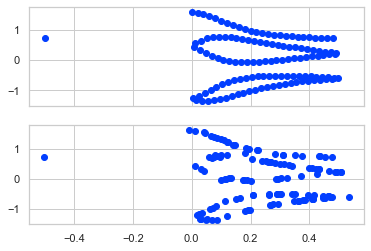

In [111]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].scatter(freq_ampli3['Freq'], freq_ampli3['Ampli'])
#plt.show()
ax[1].scatter(z1[:, 0], z1[:, 1])
plt.show()

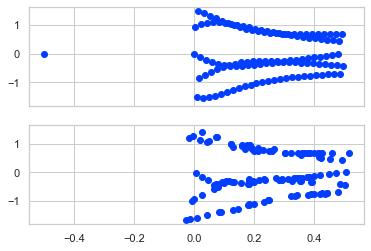

In [112]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].scatter(freq_ampli3i['Freq'], freq_ampli3i['Ampli'])
#plt.show()
ax[1].scatter(z1i[:, 0], z1i[:, 1])
plt.show()

In [113]:
print('Real: ', wasserstein_distance(freq_ampli3['Ampli'], z1[:, 1]))
print('Imag: ', wasserstein_distance(freq_ampli3i['Ampli'], z1i[:, 1]))

Real:  0.04251753965771245
Imag:  0.052822166105451075


In [114]:
sample_1 = pd.DataFrame(zip(z1[:,0],z1[:,1]),columns=['Freq','Ampli'])           
sample_1i = pd.DataFrame(zip(z1i[:,0],z1i[:,1]),columns=['Freq','Ampli'])

In [115]:
sample_1 = sample_1.sort_values(by=['Freq'],ascending=True)     
sample_1 = sample_1[sample_1.Freq > 0]                           
sample_1i = sample_1i.sort_values(by=['Freq'],ascending=True)
sample_1i = sample_1i[sample_1i.Freq > 0]                        

In [116]:
#sample_1 = sample_1[(sample_1.Ampli>1) | (sample_1.Ampli<-1)]
#sample_1i = sample_1i[(sample_1i.Ampli>1) | (sample_1i.Ampli<-1)]

In [117]:
f = fftpack.fftfreq(250)                                    # The frequency corresponding to each value in FFT is stored in 'f'

In [118]:
sd = dict(zip(np.round(f,3),np.zeros(len(f))))

In [119]:
sample_1.Freq = sample_1.Freq.apply(lambda x:round(x,3))       
sample_1i.Freq = sample_1i.Freq.apply(lambda x:round(x,3))

In [120]:
samp_1 = dict(zip(sample_1.Freq,sample_1.Ampli))
samp_1i = dict(zip(sample_1i.Freq,sample_1i.Ampli))

In [121]:
for i in samp_1.keys():
    if i in sd:
        sd[i] = samp_1[i]
        sd[-i] = samp_1[i]
    elif i+0.001 in sd:
        sd[i+0.001] = samp_1[i]
        sd[-(i+0.001)] = samp_1[i]
    elif i-0.001 in sd:
        sd[i-0.001] = samp_1[i]
        sd[-(i-0.001)] = samp_1[i]
sd

{0.0: 0.0,
 0.004: 0.0,
 0.008: 0.0,
 0.012: 0.42310261862203824,
 0.016: 0.0,
 0.02: 0.0,
 0.024: -1.1723349919874222,
 0.028: -1.3279412564765287,
 0.032: -1.14029160402032,
 0.036: 0.0,
 0.04: 1.533023600152271,
 0.044: 0.0,
 0.048: 1.5126543778715513,
 0.052: -1.3390057310077486,
 0.056: 0.0,
 0.06: -0.9919344142055179,
 0.064: 0.0,
 0.068: 0.6972749656122272,
 0.072: -0.9535927523710911,
 0.076: 1.3917930318198886,
 0.08: 0.7849256480941135,
 0.084: 0.7454774354704838,
 0.088: 1.344213019334022,
 0.092: 0.0,
 0.096: 0.7332666850669114,
 0.1: 1.2999989821927924,
 0.104: 0.0,
 0.108: 1.277334761621772,
 0.112: 0.0,
 0.116: -0.0062053287457900855,
 0.12: 0.7831296259010605,
 0.124: 1.2157207362291769,
 0.128: 0.0,
 0.132: 0.0,
 0.136: 0.0,
 0.14: 0.0,
 0.144: 0.0,
 0.148: 0.0,
 0.152: 0.0,
 0.156: 0.0,
 0.16: 0.0,
 0.164: -0.6303018309446355,
 0.168: 0.0,
 0.172: 0.0,
 0.176: -0.05050064054649821,
 0.18: -1.0721320505911358,
 0.184: 1.0091383646533023,
 0.188: -0.03692980529747155,
 

In [122]:
for i in samp_1i.keys():
    if i in sd:
        sd[i] = complex(sd[i],samp_1i[i])
        sd[-i] = complex(sd[i],-(samp_1i[i]))
    elif i+0.001 in sd:
        sd[i+0.001] = complex(sd[i+0.001],samp_1i[i])
        sd[-(i+0.001)] = complex(sd[i+0.001],-(samp_1i[i]))
    elif i-0.001 in sd:
        sd[i-0.001] = complex(sd[i-0.001],samp_1i[i])
        sd[-(i-0.001)] = complex(sd[i-0.001],-(samp_1i[i]))
sd

{0.0: 0.0,
 0.004: 0.0,
 0.008: -0.035807412690173054j,
 0.012: 0.42310261862203824,
 0.016: 0.0,
 0.02: 1.124700184862753j,
 0.024: -1.1723349919874222,
 0.028: (-1.3279412564765287+1.4166961878817248j),
 0.032: -1.14029160402032,
 0.036: 0.0,
 0.04: 1.533023600152271,
 0.044: 0.8176596264254397j,
 0.048: 1.5126543778715513,
 0.052: -1.3390057310077486,
 0.056: 0.0,
 0.06: -0.9919344142055179,
 0.064: -0.426901970014149j,
 0.068: 0.6972749656122272,
 0.072: (-0.9535927523710911-0.4074581501094302j),
 0.076: (1.3917930318198886+1.2211919495196188j),
 0.08: (0.7849256480941135-0.5038818005947396j),
 0.084: (0.7454774354704838-1.3775991896076412j),
 0.088: (1.344213019334022-1.3728025678240054j),
 0.092: -0.31884278830247204j,
 0.096: 0.7332666850669114,
 0.1: (1.2999989821927924-0.3704971436794513j),
 0.104: 0.0,
 0.108: 1.277334761621772,
 0.112: 0.0,
 0.116: -0.0062053287457900855,
 0.12: 0.7831296259010605,
 0.124: (1.2157207362291769+0.6588510864151669j),
 0.128: -1.3086835921792563

In [123]:
value = list(sd.values())

# Final IFFT 

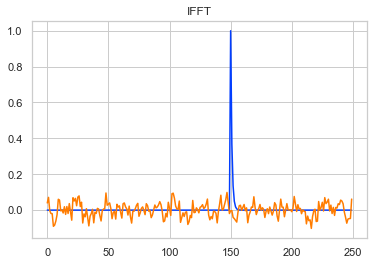

In [124]:
ift = fft.ifft(value)
plt.title('IFFT')
plt.plot(signal_3['Time'], signal_3['Value'])
plt.plot(x,ift)

# Log freq

<AxesSubplot:xlabel='Freq', ylabel='Ampli'>

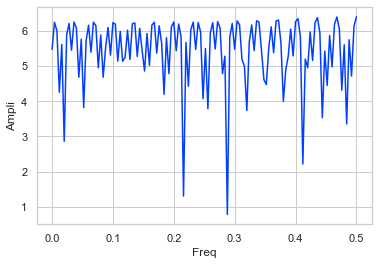

In [7]:
log_ampli = np.log(freq_ampli["Ampli"])
log_freq_ampli= pd.DataFrame(zip(freq_ampli['Freq'],log_ampli),columns=['Freq','Ampli'])
log_freq_ampli = log_freq_ampli.loc[log_freq_ampli['Ampli'] != float('-inf')]
sns.lineplot(log_freq_ampli['Freq'], log_freq_ampli['Ampli'])

In [8]:
dfx = log_freq_ampli
lowest_bic = np.infty
bic = []
n_components_range = range(1, 50)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm

In [9]:
print(best_gmm2, '\n')
print('WEIGHTS -', best_gmm2.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', best_gmm2.means_, '\n')

GaussianMixture(covariance_type='diag', n_components=4) 

WEIGHTS - [0.3678774  0.43981463 0.16913571 0.02317226] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[0.24703199 6.18140264]
 [0.23991275 5.47110186]
 [0.27552747 4.29329381]
 [0.30225116 1.41172669]] 



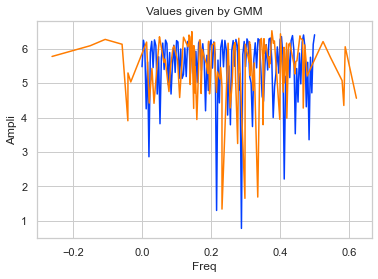

In [10]:
z2,_ = best_gmm2.sample(125)
plt.title('Actual data')
sns.lineplot(log_freq_ampli['Freq'], log_freq_ampli['Ampli'])
#plt.show()
plt.title('Values given by GMM')
sns.lineplot(z2[:,0],z2[:,1])
plt.show()

In [11]:
wasserstein_distance(log_freq_ampli['Ampli'], z2[:, 1])

0.06414717234625276

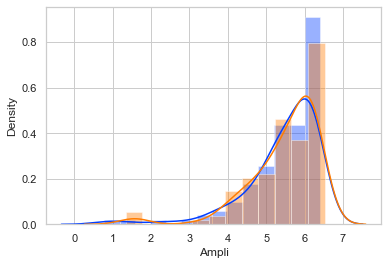

In [14]:
sns.distplot(log_freq_ampli['Ampli'], kde = True)
sns.distplot(z2[:, 1], kde = True)
plt.show()

# Cepstrum

<AxesSubplot:xlabel='Quefrency', ylabel='Cepstrum'>

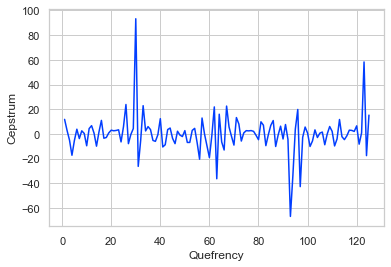

In [7]:
frame_size = signal_3.shape[0]
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
y = np.array(signal_3['Value'])
yf = fftpack.fft(y)
yf1 = yf[yf != 0]
quefrency = np.fft.rfftfreq(np.log(yf1).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf1)))
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep = cep.iloc[1:,:]
sns.lineplot(cep.Quefrency,cep.Cepstrum)

In [8]:
dfx = cep
lowest_bic = np.infty
bic = []
n_components_range = range(1, 50)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

In [9]:
print(best_gmm3, '\n')
print('WEIGHTS -', best_gmm3.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', best_gmm3.means_, '\n')

GaussianMixture(covariance_type='diag', n_components=5) 

WEIGHTS - [0.1642845  0.19587259 0.09021952 0.54162339 0.008     ] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 13.69196272   0.24086356]
 [108.3093955   -0.20406256]
 [ 92.93315933  -9.99169058]
 [ 57.07175173   0.47239917]
 [ 30.          93.26249848]] 



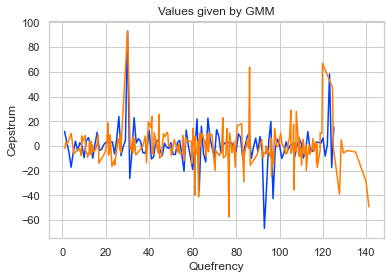

In [10]:
#fig, ax = plt.subplots(2, sharex='all', sharey='all', figsize = (8, 8))
z3,_ = best_gmm3.sample(250)
plt.title('Actual data')
sns.lineplot(cep['Quefrency'], cep['Cepstrum'])
#plt.show()
plt.title('Values given by GMM')
sns.lineplot(z3[:,0],z3[:,1])
plt.show()

In [11]:
wasserstein_distance(cep['Cepstrum'], z3[:, 1])

1.6259832524163422

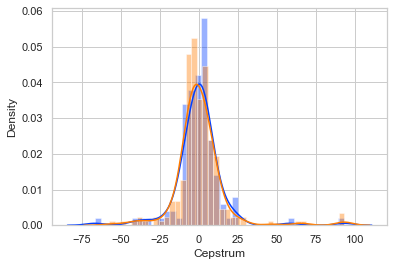

In [12]:
sns.distplot(cep['Cepstrum'], kde = True)
sns.distplot(z3[:, 1], kde = True)
plt.show()